In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
# 2. Load dataset
df = pd.read_csv('citrus.csv')

In [5]:
# 3. Eksplorasi data
print(df.head())
print(df.info())
print(df['name'].value_counts())

     name  diameter  weight  red  green  blue
0  orange      2.96   86.76  172     85     2
1  orange      3.91   88.05  166     78     3
2  orange      4.42   95.17  156     81     2
3  orange      4.47   95.60  163     81     4
4  orange      4.48   95.76  161     72     9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      10000 non-null  object 
 1   diameter  10000 non-null  float64
 2   weight    10000 non-null  float64
 3   red       10000 non-null  int64  
 4   green     10000 non-null  int64  
 5   blue      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None
name
orange        5000
grapefruit    5000
Name: count, dtype: int64


In [6]:
label_map = {'orange': 1, 'grapefruit': 0}
df['label'] = df['name'].map(label_map)

In [7]:
X = df[['diameter', 'weight', 'red', 'green', 'blue']]
y = df['label']

In [8]:
# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# 7. Model training
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
# 8. Prediksi
y_pred = model.predict(X_test)

In [11]:
# 9. Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[938  50]
 [ 63 949]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       988
           1       0.95      0.94      0.94      1012

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



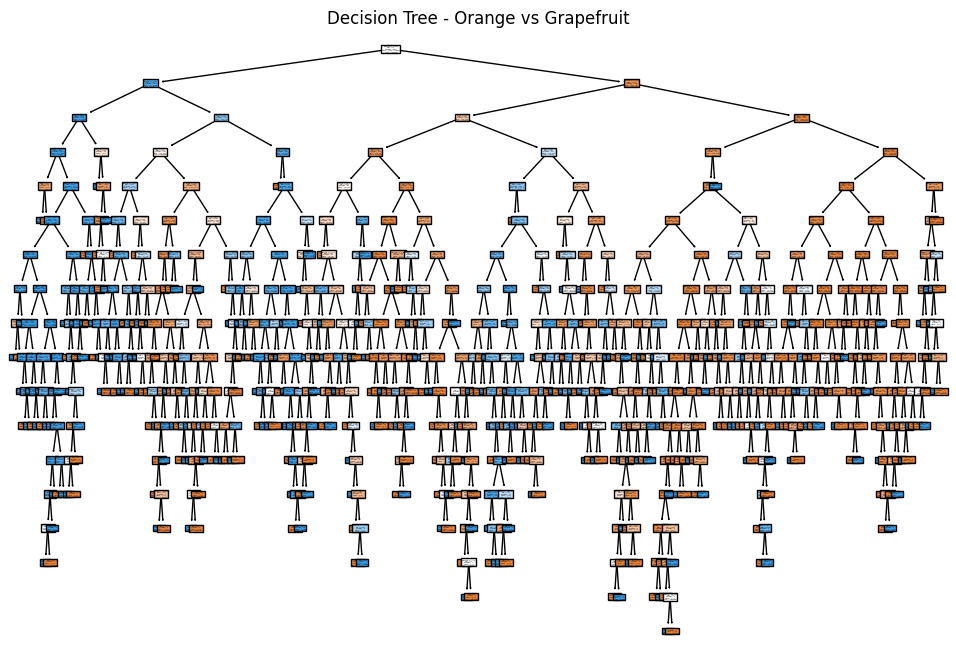

In [12]:
# 10. Visualisasi Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=["grapefruit", "orange"], filled=True)
plt.title("Decision Tree - Orange vs Grapefruit")
plt.show()